# NLP Question 1
## Group 13

1. Aditya Sharma - 12210048
2. Adarsh Balan - 12220062
3. Thaneshwar Sahu - 12220083
4. Muhammad Ashraf Hussain - 12220048
5. Prathyusha Thatipelli - 12220044

In [ ]:
# Importing all necessary libraries
import pandas as pd
from pydantic import BaseModel
from typing import List, Optional
import spacy
from spacy.lang.en import STOP_WORDS
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

from langchain.llms import OpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SimpleSequentialChain
from pydantic import BaseModel, ValidationError, validator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%%capture
!pip install git+https://github.com/neuml/txtai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
from txtai.embeddings import Embeddings
embeddings = Embeddings({"path": "BAAI/bge-small-en-v1.5", "content": True})

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP codes/assignment/airlines_reviews.csv')
data1 = df

# Word Frequency Analysis

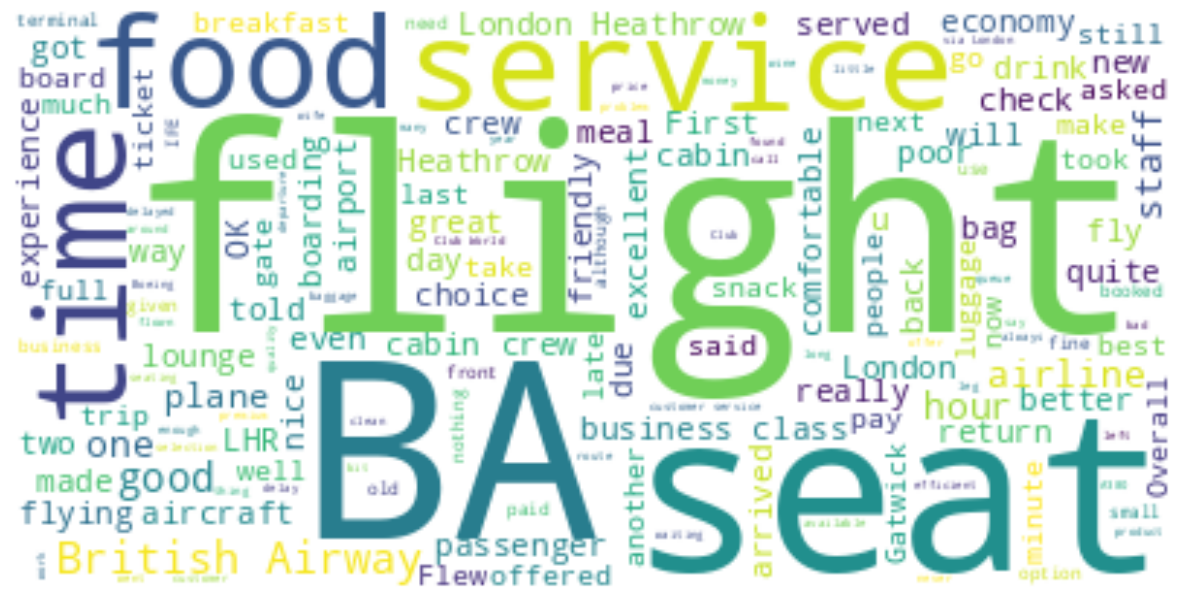

In [ ]:
text = " ".join(review for review in df['review'])

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the word cloud provided, it's evident that the majority of the reviews primarily focused on aspects related to food, services, and time. Additionally, a notable portion of the passengers appeared to have chosen British Airways (BA) for their travel experience.

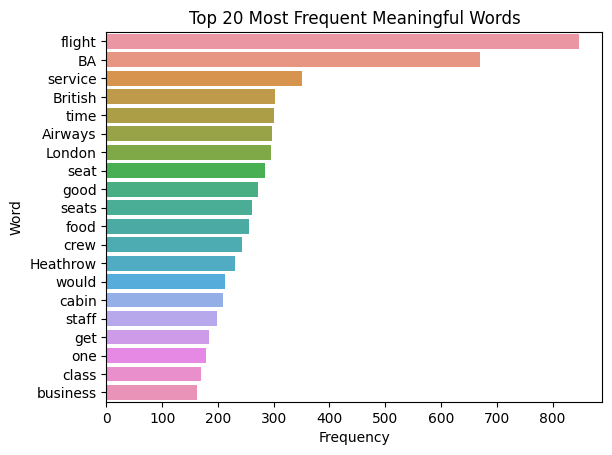

In [ ]:
# Import the necessary libraries and modules
stop_words = set(stopwords.words('english'))

# Define a function to clean and tokenize the text
def clean_tokenize(text):
    # Remove non-alphabetical characters and split the text into words
    words = re.sub(r'[^a-zA-Z]', ' ', text).split()
    # Filter out words that are stopwords (common words like "and," "the," etc.)
    return [word for word in words if word.lower() not in stop_words]

# Initialize an empty list to store the cleaned and tokenized words
words = []

# Iterate through the 'review' column in the DataFrame 'df'
for review in df['review']:
    # Clean and tokenize each review, then extend the 'words' list with the resulting words
    words.extend(clean_tokenize(review))

# Count the frequency of each word and create a dictionary
word_freq = Counter(words)

# Create a DataFrame to store the 20 most common words and their frequencies
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

# Create a bar plot to visualize the top 20 most frequent words
sns.barplot(x='Frequency', y='Word', data=freq_df)

# Set the plot's title
plt.title('Top 20 Most Frequent Meaningful Words')

# Display the plot
plt.show()

The visual above provides insight into the predominant theme of the reviews, which is primarily focused on flights. The top 20 meaningful words help identify the key aspects discussed within our dataset. These reviews predominantly revolve around topics such as service, timeliness, cabin conditions, staff interactions, seating, and food, among others.

In [ ]:
# Below is an example code to fetch a review involving reputation.
query = 'reputation'
uid = embeddings.similarity(query, df)[0:5]

for id in uid:
  print(f"{df.loc[id[0]]['review']}")

 The service was excellent. The cabin staff were attentive and efficient. The food and drinks were very good. The seat in the new suites is extremely comfortable and the additional privacy is really nice. Overall a very enjoyable flight.



In [ ]:
df['review'] = df['review'].str.replace('[^\w\s]', '')

<ipython-input-9-37050d3533fe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]', '')


# Risk Category for Reviews

In [ ]:
# Define a function to categorize risk based on keywords
def categorize_risk(text):
    safety_risk_keywords = ["danger", "unsafe", "accident", "injury", "hazard", "life threatening", "dangerous", "perilous", "unhealthy", 'health', "torrid" ]
    operational_risk_keywords = ["delay", "cancellation", "diversion", "disruption", "unable to fly", "grounded", "diverted", "turnaround", "technical fault", "maintenance issue"]
    reputational_risk_keywords = ["embarrassing", "unacceptable", "disappointed", "will not fly again", "angry", "furious", "enraged", "appalled", "disgusted", "ashamed", "humiliating", "degrading", "insulting", "unforgivable", "dealbreaker", "last straw"]
    financial_risk_keywords = ["compensation", "refund", "voucher", "credit", "money", "losses", "damages", "reimbursement", "vouchers", "credits", "refunds", "mileage points", "lawsuits", "legal action"]

    if any(keyword in text for keyword in safety_risk_keywords):
        return "Safety risk"
    elif any(keyword in text for keyword in operational_risk_keywords):
        return "Operational risk"
    elif any(keyword in text for keyword in reputational_risk_keywords):
        return "Reputational risk"
    elif any(keyword in text for keyword in financial_risk_keywords):
        return "Financial risk"
    else:
        return "No specific risk"

# Apply the function to create a new 'risk' column
df['risk'] = df['review'].apply(categorize_risk)

# Extracting From and To Location

In [ ]:
# List of cities to search for in the reviews
cities = ['Abu Dhabi', 'ACE', 'Amsterdam', 'Athens', 'Austin', 'Belfast', 'Bologna', 'Brussels', 'Bucharest', 'Cape Town', 'Copenhagen', 'Corfu', 'Doha', 'Dubrovnik', 'Florence', 'Frankfurt', 'Gatwick', 'Geneva', 'Glasgow', 'Gothenburg', 'Hamburg', 'Heathrow', 'Helsinki', 'Hong Kong', 'Istanbul', 'JNB', 'Johannesburg', 'Kalamata', 'Lanzarote', 'Las Vegas', 'LAX-LHR-JNB-LHR-LAX', 'London', 'London Club World / Club Europe', 'London Gatwick', 'London Heathrow', 'Los Angeles', 'Madrid', 'Manchester', 'MIA', 'Miami', 'Milan Malpensa', 'Mumbai', 'Naples', 'Nassau', 'New York', 'New York JFK', 'Newark', 'Newcastle', 'NCL-LHR', 'Paris', 'Paris CDG', 'Philadelphia', 'Pisa', 'Prague', 'Rio de Janeiro', 'San Diego', 'San Francisco', 'Sao Paulo', 'SFO', 'Shanghai', 'Singapore', 'Stockholm Arlanda', 'Sydney', 'Tampa', 'Tokyo Narita', 'Toronto', 'Valencia', 'Vancouver', 'Warsaw', 'Washington', 'Washington Dulles', 'ZRH', 'Zurich']

# Define a function to extract locations (cities) from a review text
def extract_locations(review):
    # Search for the first city mentioned in the review using a regular expression
    first_city_match = re.search(r'\b(?:' + '|'.join(cities) + r')\b', review)
    if first_city_match:
        # If a city is found, set it as the 'from_city' and initialize 'to_city' as None
        from_city = first_city_match.group()
        to_city = None

        # Loop through the list of cities to find a 'to_city' mentioned in the review
        for city in cities:
            # Define a pattern to search for a destination city after the 'from_city'
            pattern = rf'{re.escape(city)}(?:\s+city)?\s+to\s+(\w+)'
            match = re.search(pattern, review, flags=re.IGNORECASE)

            # Define a pattern to search for a chain of destination cities after the 'from_city'
            pattern_city_to_city_to_city = rf'{re.escape(city)}(?:\s+city)?\s+to\s+(\w+)\s+to\s+(\w+)\s+to\s+(\w+)'
            match_city_to_city_to_city = re.search(pattern_city_to_city_to_city, review, flags=re.IGNORECASE)

            # If a destination city is found, assign it to 'to_city' and break the loop
            if match:
                to_city = match.group(1)
                break
            elif match_city_to_city_to_city:
                to_city = match_city_to_city_to_city.group(2)
                break

        # Return the 'from_city' and 'to_city' (if found)
        return from_city, to_city
    else:
        # If no city is found in the review, return None for both 'from_city' and 'to_city'
        return None, None

# Apply the 'extract_locations' function to each review in the DataFrame 'df'
# and create two new columns 'from' and 'to' to store the extracted locations
df['from'], df['to'] = zip(*df['review'].apply(extract_locations))

# Sentiment Category

In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Split long texts into smaller segments
def process_text(text, max_length=512):
    # Split the text into smaller segments
    segments = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    # Analyze sentiment for each segment
    sentiments = [classifier(segment)[0] for segment in segments]
    return sentiments

# Create a new column 'sentiment' to store the sentiment classification
df['sentiment'] = df['review'].apply(lambda text: process_text(text))

# Define a function to classify primary sentiments
def classify_primary_sentiment(sentiments):
    for sentiment in sentiments:
        label = sentiment['label']
        score = sentiment['score']

        if label == 'POSITIVE':
            if score > 0.99:
                return 'very positive'
            else:
                return 'positive'
        elif label == 'NEGATIVE':
            if score > 0.99:
                return 'very negative'
            else:
                return 'negative'
    return 'neutral'  # Default to neutral if neither positive nor negative

# Apply the function to create a new 'category_sentiment' column
df['category_sentiment'] = df['sentiment'].apply(classify_primary_sentiment)

# Airlines Category

In [ ]:
def categorize_airline_name(text):
    airline_keywords = {
        "british airways": "British Airways",
        "emirates": "Emirates",
        "american airlines": "American Airlines",
        "air nz": "Air New Zealand",
        "air new zealand": "Air New Zealand",
        "united airlines": "United Airlines",
        "delta air lines": "Delta Air Lines",
        "etihad airways": "Etihad Airways",
        "qatar airways": "Qatar Airways",
        "virgin atlantic": "Virgin Atlantic",
        "cathay pacific": "Cathay Pacific",
        "singapore airlines": "Singapore Airlines",
        "lufthansa": "Lufthansa",
        "air france": "Air France",
        "klm": "KLM",
        "turkish airlines": "Turkish Airlines",
    }

    for keyword, airline_name in airline_keywords.items():
        if keyword in text.lower():
            return airline_name

    return "Unspecified"

# Apply the function to create a new 'airline_name' column
df['airline_name'] = df['review'].apply(categorize_airline_name)

In [ ]:
df['sentiment_score'] = df['sentiment'].apply(lambda sentiments: min(sentiment['score'] for sentiment in sentiments))

# Analyzing Review Categories

In [ ]:
def categorize_reviews(text):
    text = text.lower()  # Convert text to lowercase

    # Delays
    if any(keyword in text for keyword in ['delay']):
        return "Delays"

    # Seat Comfort
    elif "seat" in text:
        return "Seat Comfort"

    # Legroom
    elif "legroom" in text:
        return "Legroom"

    # Space
    elif "space" in text:
        return "Space"

    # Cabin Features and Amenities
    elif any(keyword in text for keyword in ["wifi", "entertainment", "power outlet", "amenities"]):
        return "Cabin Features and Amenities"

    # Cleanliness and Hygiene
    elif "clean" in text:
        return "Cleanliness and Hygiene"

    # Flight Issues (Cancellations, Diversions, Misconnections)
    elif any(keyword in text for keyword in ["cancellation", "grounded", "rebook", "missed connection", "diverted", "onboard", "in-flight", "inflight"]):
        return "Flight Issues"

    # Comfort and Amenities (General)
    elif any(keyword in text for keyword in ["comfort", "amenities"]):
        return "Comfort and Amenities"

    # Crew and Staff Service
    elif any(keyword in text for keyword in ["staff", "crew", "service"]):
        return "Crew and Staff Service"

    # Booking Issues
    elif any(keyword in text for keyword in ["booking", "rebook", "reschedule", "late", "cancellation", "website", "app", "reservation", "ticket", "pricing", "fees", "upgrade", "fare"]):
        return "Booking Issues"

    # Food and Beverages
    elif any(keyword in text for keyword in ["food", "meal", "drink", "beverage", "snack"]):
        return "Food and Beverages"

    # Baggage Handling
    elif any(keyword in text for keyword in ["luggage", "bag", "baggage", "lost", "damaged"]):
        return "Baggage Handling"

    # Airport Experience
    elif any(keyword in text for keyword in ["check-in", "boarding", "lounge", "wait", "terminal", "airport", "gate", "easy", "chaos", "security check"]):
        return "Airport Experience"

    # Customer Service
    elif any(keyword in text for keyword in ["customer service", "call center", "phone", "email", "representative"]):
        return "Customer Service"

    # Safety & Operations
    elif any(keyword in text for keyword in ["safety", "emergency", "evacuation", "landing", "turbulence", "technical issue"]):
        return "Safety & Operations"

    # Default category if no keywords match
    else:
        return "Other"
df['custom_category'] = df['review'].apply(categorize_reviews)

In [ ]:
df.custom_category.value_counts()

Seat Comfort                    256
Crew and Staff Service           88
Delays                           72
Cabin Features and Amenities     18
Booking Issues                   16
Flight Issues                    13
Cleanliness and Hygiene          12
Space                             7
Other                             6
Baggage Handling                  3
Legroom                           3
Food and Beverages                3
Comfort and Amenities             2
Airport Experience                1
Name: custom_category, dtype: int64


The above data represents the number of reviews or complaints in different categories related to airline or flight experiences. It shows that seat comfort is the most commonly mentioned category with 256 reviews, followed by crew and staff service with 88 reviews, and delays with 72 reviews. Other categories include cabin features, booking issues, flight issues, cleanliness, space, and more, each with varying numbers of reviews or complaints.

# Categorizing Reviews based on Risk

In [ ]:
# Define a function to categorize risk based on keywords
def categorize_risk(text):
    if any(keyword in text for keyword in ["danger", "unsafe", "accident", "injury", "hazard", "torrid"]):
        return "Safety risk"
    elif any(keyword in text for keyword in ["delay", "late", "push back", "wait", "reschedule"]):
        return "Flight Delays and Late Departures"
    elif any(keyword in text for keyword in ["cancellation", "cancelled", "unable to fly"]):
        return "Flight Cancellations"
    elif any(keyword in text for keyword in ["diversion", "disruption", "diverted"]):
        return "Flight Diversions and Disruptions"
    elif "slow" in text:
        return "Service Inefficiencies"
    elif any(keyword in text for keyword in ["embarrassing", "embarrassed", "unacceptable", "unhelpful", "disappointed", "dissapointment", "dissapointing" "will not fly again", "slow boarding", "poor", "unpleasant", "lost", "cramped", "uncomfortable", "unfriendly", "inconsiderate", "customer service", "horrible", "worst", "dirty", "inconvenient", "ludicruous", "lost", "rude", "mediocre"]):
        return "Reputational risk"
    elif any(keyword in text for keyword in ["compensation", "refund", "voucher", "credit", "money", "reimburse", "policy", "missed", "misplaced"]):
        return "Financial risk"
    else:
        return "No specific risk"

# Apply the function to create a new 'risk' column
df['risk'] = df['review'].apply(categorize_risk)

In [ ]:
df.risk.value_counts()

Flight Delays and Late Departures    189
No specific risk                     137
Reputational risk                    115
Financial risk                        25
Service Inefficiencies                15
Flight Cancellations                  13
Safety risk                            6
Name: risk, dtype: int64

In [ ]:
df# Iterate through the columns and get unique value counts
for column in df.columns:
    unique_counts = df[column].value_counts()
    print(f"Column: {column}\n{unique_counts}\n")

Column: review
LHRWarsaw Economy on an A320 Plane seemed brand new Was seated in 8C towards the front of Economy and thats obviously a seat that gets configured for Club Europe from time to time as the seat pitch was pretty generous Complimentary breakfast consisting of coffee and a filled croissant was perfectly OK Service efficient Flight left and landed on time Textbook stuff really No complaints at all\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
!pip install -q langchain openai
import openai
import os
from getpass import getpass
from pprint import pprint

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_extraction_chain, create_extraction_chain_pydantic
from langchain.prompts import ChatPromptTemplate

In [ ]:
# Prompt engineering
reviews = [
    {
        "review": "London Heathrow to Stockholm Arlanda. BA is rapidly becoming a budget airline at premium airline prices. I'm a silver card holder and have always chosen to fly BA, primarily to maintain it. Not anymore. It's not worth bothering with the galleries Lounge at Heathrow now the hot food has been replaced (most of the time) with sandwiches and cakes. The small touches like the takeaway biscuits etc. have gone too. And I'm now on my fourth time of having to stay an extra night at my end destination because there are no evening seats on the flights - even 6 weeks ahead. It's hard to raise a smile from many of the check-in staff/stewards - they don't seem to care anymore. The last time I flew premium economy, the food was inedible. Just about to book with another airline on principle. I have to say I hope BA ends up learning the hard way that saving pennies will lose them pounds when customers leave. If you're going to be a low-cost airline, charge low-cost prices.",
        "prompt": "review: \n ```London Heathrow to Stockholm Arlanda. BA is rapidly becoming a budget airline at premium airline prices. I'm a silver card holder and have always chosen to fly BA, primarily to maintain it. Not anymore. It's not worth bothering with the galleries Lounge at Heathrow now the hot food has been replaced (most of the time) with sandwiches and cakes. The small touches like the takeaway biscuits etc. have gone too. And I'm now on my fourth time of having to stay an extra night at my end destination because there are no evening seats on the flights - even 6 weeks ahead. It's hard to raise a smile from many of the check-in staff/stewards - they don't seem to care anymore. The last time I flew premium economy, the food was inedible. Just about to book with another airline on principle. I have to say I hope BA ends up learning the hard way that saving pennies will lose them pounds when customers leave. If you're going to be a low-cost airline, charge low-cost prices```\n\nJourney from: London\nJourney to: Stockholm\nAirlines: BA or British Airways\nType of Risk: Reputational risk\nCategory Type: Service Quality, Pricing and Value for Money, Customer Loyalty, Booking and Availability Issues, and Corporate Strategy and Image\nEmotions: Frustration, Disappointment, Annoyance, Dissatisfaction, and Concern\nSummary: BA's declining service disappoints loyal customers; considering switching to competitors.\nUrgency: Yes\n"
    },
    {
        "review": "Check-in was ok, all documents were scanned without problems. The flight was delayed by 50 minutes due to crew members being stuck on the M25. Not the airline's fault. Three replacement crew members were found, and boarding onto a new A321 neo went ahead. The Club Europe cabin was 12 rows of economy seats with the middle seat blocked off. For me at 5.11 tall, I can fit ok, however, anyone taller than me might struggle with limited legroom. The inflight service was a stop-start affair, nothing to write home about. The crew failed to work as a team. You had to go to the galley to get extra drinks. I was even served cool coffee with filter paper in the bottom of the cup. Landing and disembarking went without a hitch and included a bus ride to the terminal. Not BA's finest hour.",
        "prompt": "review: \n ```Check-in was ok, all documents were scanned without problems. The flight was delayed by 50 minutes due to crew members being stuck on the M25. Not the airline's fault. Three replacement crew members were found, and boarding onto a new A321 neo went ahead. The Club Europe cabin was 12 rows of economy seats with the middle seat blocked off. For me at 5.11 tall, I can fit ok, however, anyone taller than me might struggle with limited legroom. The inflight service was a stop-start affair, nothing to write home about. The crew failed to work as a team. You had to go to the galley to get extra drinks. I was even served cool coffee with filter paper in the bottom of the cup. Landing and disembarking went without a hitch and included a bus ride to the terminal. Not BA's finest hour.```\n\nJourney from: Not specified\nJourney to: Not specified\nAirlines: BA or British Airways\nType of Risk: Operational Risk, Service Quality, Crew Management\nCategory Type: Check-in Process, Flight Delay, Cabin Configuration and Comfort, Inflight Service, Crew Coordination, Disembarking Process\nEmotions: Frustration, Disappointment, Dissatisfaction\nSummary: BA faces operational challenges, from delayed flights to inconsistent inflight service, impacting passenger satisfaction.\nUrgency: No\n"
    },
    {
      "review": "Bucharest to London Heathrow, and the worst thing above all are the British Airways business class seats and the shocking lack of legroom. Cramped into a space which is less than many economy seats. And this was Club Europe! Poor breakfast - one slice of bacon, half tomato, a few tinned mushrooms, and an omelette so overcooked it was grey inside. The seat itself was comfortable, and staff were good. The toilet waste bin had tape around it, and so a sack was used for rubbish instead! Not a good flight overall.",
      "prompt": "review: \n ```Bucharest to London Heathrow, and the worst thing above all are the British Airways business class seats and the shocking lack of legroom. Cramped into a space which is less than many economy seats. And this was Club Europe! Poor breakfast - one slice of bacon, half tomato, a few tinned mushrooms, and an omelette so overcooked it was grey inside. The seat itself was comfortable, and staff were good. The toilet waste bin had tape around it, and so a sack was used for rubbish instead! Not a good flight overall.```\n\nJourney from: Bucharest\nJourney to: London Heathrow\nAirlines: BA or British Airways\nType of Risk: Service Quality, Cabin Configuration and Comfort, Food Quality\nCategory Type: Seat Comfort and Legroom, Inflight Catering, Staff Performance, Aircraft Cleanliness\nEmotions: Displeasure, Discomfort, Disappointment\nSummary: Dissatisfaction with BA's Club Europe, highlighting issues with cramped seating, poor breakfast, and cleanliness concerns.\nUrgency: No\n"
    },
    {
      "review": "Flight from Heathrow to Newark. The new Dreamliner was fantastic. Very comfortable, quiet, and clean. The cabin crew were superb, very professional with customer service being their priority. I appreciate that flying on a new aircraft makes a difference to the flight; however, if BA continues to invest in their fleet and maintain an excellent level of customer service, I can see no other reason to fly with another carrier, especially when considering BA's avios points usage, which allows all of your points to be spent on flights. Virgin, however, dictates how many points you can spend on each flight. I've flown with BA and Virgin many times; it was a nice attempt by Virgin advertising themselves in terminal 5. However, when you're sat in terminal 5 after experiencing a quick and easy run through the terminal about to board a brand new aircraft, it's hard to see the advertisements working.",
      "prompt": "review: \n ```Flight from Heathrow to Newark. The new Dreamliner was fantastic. Very comfortable, quiet, and clean. The cabin crew were superb, very professional with customer service being their priority. I appreciate that flying on a new aircraft makes a difference to the flight; however, if BA continues to invest in their fleet and maintain an excellent level of customer service, I can see no other reason to fly with another carrier, especially when considering BA's avios points usage, which allows all of your points to be spent on flights. Virgin, however, dictates how many points you can spend on each flight. I've flown with BA and Virgin many times; it was a nice attempt by Virgin advertising themselves in terminal 5. However, when you're sat in terminal 5 after experiencing a quick and easy run through the terminal about to board a brand new aircraft, it's hard to see the advertisements working.```\n\nJourney from: Heathrow\nJourney to: Newark\nAirlines: BA or British Airways\nType of Risk: Competitive Advantage, Customer Loyalty\nCategory Type: Aircraft Comfort and Cleanliness, Cabin Crew Service, Fleet Investment, Loyalty Program\nEmotions: Satisfaction, Comfort, Appreciation\nSummary: Positive experience with BA's new Dreamliner, highlighting comfort, cleanliness, and excellent cabin crew service. Loyalty to BA emphasized, contrasting with Virgin's points system. Terminal 5 experience surpasses Virgin's advertising efforts.\nUrgency: No\n"
    },
    {
      "review": "Decided to upgrade and treat myself to BA's Club World. Check-in at JFK was efficient. Fast track through to security was a breeze. BA's Galleries Lounge at JFK T7 was shared with Cathay Pacific and LOT Polish Airline. The lounge was spacious and clean. I was encouraged to have my dinner in the lounge as the service is a sleeper service. To my disappointment, there wasn't enough food left although the selections were good but not the best. After my pre-flight dining, I decided to have a shower. The shower rooms were clean and amenities available on request. BA's Club World seat is around 20 inches wide, which was very comfortable for the quick 5-hour flight back home. I was greeted by my name by the cabin crew who were friendly. IFE option was the same as flying economy class. Menu was handed out along with Elemis amenity kit. The meals were good but portions could be better. Upon arrival in LHR, bags were delivered on time. I was told to pay a visit to their arrivals lounge, but I didn't bother. Overall, I would fly with BA's Club World product again. Seat and bed were very comfortable and well maintained despite the aging aircraft. Cabin crew friendly and enthusiastic. Just one thing that BA might want to consider is the food portions because their portions are baby-sized portions.",
      "prompt": "review: \n ```Decided to upgrade and treat myself to BA's Club World. Check-in at JFK was efficient. Fast track through to security was a breeze. BA's Galleries Lounge at JFK T7 was shared with Cathay Pacific and LOT Polish Airline. The lounge was spacious and clean. I was encouraged to have my dinner in the lounge as the service is a sleeper service. To my disappointment, there wasn't enough food left although the selections were good but not the best. After my pre-flight dining, I decided to have a shower. The shower rooms were clean and amenities available on request. BA's Club World seat is around 20 inches wide, which was very comfortable for the quick 5-hour flight back home. I was greeted by my name by the cabin crew who were friendly. IFE option was the same as flying economy class. Menu was handed out along with Elemis amenity kit. The meals were good but portions could be better. Upon arrival in LHR, bags were delivered on time. I was told to pay a visit to their arrivals lounge, but I didn't bother. Overall, I would fly with BA's Club World product again. Seat and bed were very comfortable and well maintained despite the aging aircraft. Cabin crew friendly and enthusiastic. Just one thing that BA might want to consider is the food portions because their portions are baby-sized portions.```\n\nJourney from: JFK\nJourney to: LHR\nAirlines: BA or British Airways\nType of Risk: Service Quality, Passenger Comfort, Food Quality\nCategory Type: Check-in Process, Lounge Experience, Inflight Service, Seat Comfort, Cabin Crew Interaction, Baggage Handling\nEmotions: Satisfaction, Disappointment, Pleasant Surprise\nSummary: Positive experience with BA's Club World upgrade, efficient check-in, lounge comfort, and friendly cabin crew. Minor disappointment with food portions. Overall, a comfortable and enjoyable flight.\nUrgency: No\n"
    }
]

In [ ]:
reviews = df["review"].tolist()

#Pydantic Schema for Information Retrieval

In [ ]:
# Pydantic BaseModel for data validation
class ReviewData(BaseModel):
    review: str = Field(description="This is the general review as it is")
    risk: str = Field(description="This is the relevant category that the review falls into (e.g., Safety risk, Operational risk, Reputational risk, Financial risk, No specific risk)")
    sentiment: str = Field(description="If the review is very positive, positive, negative, very negative, neutral")
    from_location: str = Field(description="The location from which the customer has boarded from, give NA if no information is provided")
    to_location: str = Field(description="The location to which the customer has traveled to, give NA if no information is provided")
    custom_category: str = Field(description="Derives a custom category that best suits the mentioned review (e.g., Flight Issues, Service Quality, Baggage Handling, Booking Experience, Airport Experience, Customer Service, Safety & Operations, Other)")
    emotions: str = Field(description="Defines the emotions of the customer such as happy, sad, angry, frustration, disappointment, annoyance, dissatisfaction, concern, etc.")
    urgency: str = Field(description="Classify based on understanding the urgency (Yes/No)")
    summary: str = Field(description="This is the 12 words summary of the review provided for better understanding of the scenario")


 The below code defines a class that processes and categorizes airline reviews, extracting valuable information and categorizing reviews based on various aspects such as sentiment, airline name, categories, and risk. The knowledge repository is created, it is a structured representation of this categorized information for further analysis or use.

In [ ]:
# The below function creates a knowledge repository using all the functions which we have created earlier. Sentiment, Airline Name, Urgency, Risk, From and To location etc.. are the few of the many columns which would be created in the final dataframe.
import pandas as pd
import re
from txtai.embeddings import Embeddings
from transformers import pipeline

class AirlineReviewKnowledgeRepo:
    def __init__(self, csv_path, model_path="BAAI/bge-small-en-v1.5"):
        self.df = pd.read_csv(csv_path)
        self.df['review'] = self.df['review'].str.replace('[^\w\s]', '')
        self.embeddings = Embeddings({"path": model_path, "content": True})
        self.classifier = pipeline("sentiment-analysis")

    def extract_locations(self, review):
        match = re.search(r'(\w+)\s+to\s+(\w+)', review)
        if match:
            return match.group(1), match.group(2)
        else:
            return None, None

    def process_text(self, text, max_length=512):
        segments = [text[i:i+max_length] for i in range(0, len(text), max_length)]
        sentiments = [self.classifier(segment)[0] for segment in segments]
        return sentiments

    def classify_primary_sentiment(self, sentiments):
        for sentiment in sentiments:
            label = sentiment['label']
            score = sentiment['score']

            if label == 'POSITIVE':
                if score > 0.99:
                    return 'very positive'
                else:
                    return 'positive'
            elif label == 'NEGATIVE':
                if score > 0.99:
                    return 'very negative'
                else:
                    return 'negative'
        return 'neutral'

    def categorize_airline_name(self, text):
        airline_keywords = {
            "british airways": "British Airways",
            "emirates": "Emirates",
            "american airlines": "American Airlines",
            "air nz": "Air New Zealand",
            "air new zealand": "Air New Zealand",
            "united airlines": "United Airlines",
            "delta air lines": "Delta Air Lines",
            "etihad airways": "Etihad Airways",
            "qatar airways": "Qatar Airways",
            "virgin atlantic": "Virgin Atlantic",
            "cathay pacific": "Cathay Pacific",
            "singapore airlines": "Singapore Airlines",
            "lufthansa": "Lufthansa",
            "air france": "Air France",
            "klm": "KLM",
            "turkish airlines": "Turkish Airlines",
        }

        for keyword, airline_name in airline_keywords.items():
            if keyword in text.lower():
                return airline_name
        return "Unspecified"

    def categorize_reviews(self, text):
        if any(keyword in text for keyword in ["delayed", "late", "cancellation", "missed connection", "diverted", "grounded", "reschedule", "rebook", "onboard", "in-flight", "inflight"]):
            return "Flight Issues"
        elif any(keyword in text for keyword in ["food", "meal", "entertainment", "wifi", "seat", "comfort", "crew", "staff", "service", "amenities", "clean", "legroom", "amenties"]):
            return "Baggage Handling"
        elif any(keyword in text for keyword in ["luggage", "bag", "baggage", "lost", "damaged", "delayed"]):
            return "Service Quality"
        elif any(keyword in text for keyword in ["website", "app", "reservation", "ticket", "booking", "pricing", "fees", "upgrade", "fare", 'ticket']):
            return "Booking Experience"
        elif any(keyword in text for keyword in ["check-in", "boarding", "lounge", "wait", "terminal", "airport", "gate", "easy", "chaos", "security check",'food']):
            return "Airport Experience"
        elif any(keyword in text for keyword in ["customer service", "call center", "phone", "email", "representative"]):
            return "Customer Service"
        elif any(keyword in text for keyword in ["safety", "emergency", "evacuation", "landing", "turbulence", "technical issue"]):
            return "Safety & Operations"
        else:
            return "Other"

    def categorize_risk(self, text):
        if any(keyword in text for keyword in ["danger", "unsafe", "accident", "injury", "hazard", "torrid"]):
            return "Safety risk"
        elif any(keyword in text for keyword in ["delay", "cancellation", "diversion", "disruption", "unable to fly", "late", "push back", "wait", "reschedule", "cancelled", "slow"]):
            return "Operational risk"
        elif any(keyword in text for keyword in ["embarrassing", "embarrassed", "unacceptable", "unhelpful", "disappointed", "dissapointment", "dissapointing", "will not fly again", "slow boarding", "poor", "unpleasant", "lost", "cramped", "uncomfortable", "unfriendly", "inconsiderate", "customer service", "horrible", "worst", "dirty", "inconvenient", "ludicruous", "rude", "mediocre", "switch"]):
            return "Reputational risk"
        elif any(keyword in text for keyword in ["compensation", "refund", "voucher", "credit", "money", "reimburse", "policy", "missed", "misplaced"]):
            return "Financial risk"
        else:
            return "No specific risk"

    def create_knowledge_repo(self):
        self.df['from'], self.df['to'] = zip(*self.df['review'].apply(self.extract_locations))
        self.df['sentiment'] = self.df['review'].apply(lambda text: self.process_text(text))
        self.df['category_sentiment'] = self.df['sentiment'].apply(self.classify_primary_sentiment)
        self.df['sentiment_score'] = self.df['sentiment'].apply(lambda sentiments: min(sentiment['score'] for sentiment in sentiments))
        self.df['airline_name'] = self.df['review'].apply(self.categorize_airline_name)
        self.df['custom_category'] = self.df['review'].apply(self.categorize_reviews)
        self.df['risk'] = self.df['review'].apply(self.categorize_risk)
        self.df['urgency'] = self.df.apply(lambda row: self.categorize_urgency(row['category_sentiment'], row['risk']), axis=1)

    def categorize_urgency(self, sentiment, risk):
        if sentiment == "negative" and (risk == "Reputational risk" or risk == "Safety risk"):
            return "Yes"
        else:
            return "No"

    def categorize_review(self, review_text):
        # Preprocess the review text if needed (e.g., removing special characters)
        processed_review = review_text.replace('[^\w\s]', '')

        # Extract necessary information from the review text
        from_location, to_location = self.extract_locations(processed_review)
        sentiments = self.process_text(processed_review)
        category_sentiment = self.classify_primary_sentiment(sentiments)
        sentiment_score = min(sentiment['score'] for sentiment in sentiments)
        airline_name = self.categorize_airline_name(processed_review)
        custom_category = self.categorize_reviews(processed_review)
        risk_category = self.categorize_risk(processed_review)
        urgency = self.categorize_urgency(category_sentiment, risk_category)

        # Return the categorization results
        categorization_results = {
            'review': review_text,
            'from': from_location,
            'to': to_location,
            'category_sentiment': category_sentiment,
            'sentiment_score': sentiment_score,
            'airline_name': airline_name,
            'custom_category': custom_category,
            'risk': risk_category,
            'urgency': urgency
        }
        return categorization_results

        # Create the knowledge repository
        knowledge_repo = self.df[['review', 'from', 'to', 'category_sentiment', 'sentiment_score', 'airline_name', 'custom_category', 'risk', 'urgency']]
        knowledge_repo = knowledge_repo.drop_duplicates(subset=['review'])

        return knowledge_repo

csv_path = '/content/drive/MyDrive/NLP codes/assignment/airlines_reviews.csv'
knowledge_repo_builder = AirlineReviewKnowledgeRepo(csv_path)
knowledge_repo = knowledge_repo_builder.create_knowledge_repo()
print(knowledge_repo)

<ipython-input-40-cd9e597a1e0e>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['review'] = self.df['review'].str.replace('[^\w\s]', '')


None


In [ ]:
# A test review has been passed to the model to categorize the review into its pydantic schema
review_text = "The flight was delayed, travelled from hyderabad to pune and the service was terrible. I will not fly with this airline again. I will switch to other airlies"
knowledge_repo_builder = AirlineReviewKnowledgeRepo(csv_path)
categorization_results = knowledge_repo_builder.categorize_review(review_text)
print(categorization_results)

<ipython-input-40-cd9e597a1e0e>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df['review'] = self.df['review'].str.replace('[^\w\s]', '')


{'review': 'The flight was delayed, travelled from hyderabad to pune and the service was terrible. I will not fly with this airline again. I will switch to other airlies', 'from': 'hyderabad', 'to': 'pune', 'category_sentiment': 'very negative', 'sentiment_score': 0.999381422996521, 'airline_name': 'Unspecified', 'custom_category': 'Flight Issues', 'risk': 'Operational risk', 'urgency': 'No'}


In [ ]:
from typing import Optional, List
from pydantic import BaseModel, Field
from langchain.chains import create_extraction_chain_pydantic

In [ ]:
# Intiating chatgpt 3.5 model
import os
import openai
from getpass import getpass
from pprint import pprint
os.environ['OPENAI_API_KEY'] = getpass("OpenAI Key:")
openai.api_key  = os.getenv('OPENAI_API_KEY')

from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.chains import RetrievalQA
from txtai.pipeline import Labels


# chat completion llm
llm = ChatOpenAI(
    model_name='gpt-3.5-turbo-0613',
    temperature=0.5
)
from pydantic import BaseModel, Field

OpenAI Key:··········


In [ ]:
from txtai.pipeline import Labels

def create_extraction_chain_pydantic(pydantic_schema, llm):
    # Create an instance of the Labels pipeline
    pipeline = Labels(llm)

    def run_chain(text):
        # Run the pipeline on the input text
        results = pipeline(text)

        # Map the results to the Pydantic schema
        pydantic_results = [
            pydantic_schema(
                review=result["text"],
                risk=result.get("risk", "No specific risk"),
                sentiment=result.get("sentiment", "neutral"),
                from_location=result.get("from_location", "NA"),
                to_location=result.get("to_location", "NA"),
                custom_category=result.get("custom_category", "Other"),
                emotions=result.get("emotions", "NA"),
                urgency=result.get("urgency", "No"),
                summary=result.get("summary", "NA")
            )
            for result in results
        ]

        return pydantic_results
    return run_chain

In [ ]:
from langchain.chains import create_extraction_chain, create_extraction_chain_pydantic

In [ ]:
# a function to categorize the urgency associated to the review
def determine_urgency(row):
    if row['category_sentiment'] in ['negative', 'very negative'] and (row['risk'] in ['Operational risk', 'Reputational risk']):
        return 'Yes'
    return 'No'

df['urgency'] = df.apply(determine_urgency, axis=1)

In [ ]:
review_data_schema = {
    "properties": {
        "risk": {
            "type": "string",
            "description": "Identify the type of risk mentioned in the review, if any, such as 'Safety Risk', 'Operational Risk', 'Reputational Risk', 'Financial Risk'. If no specific risk is noted, label as 'No Specific Risk'."
        },
        "sentiment": {
            "type": "string",
            "description": "Classify the overall sentiment of the review. Possible values: 'Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative'."
        },
        "from_location": {
            "type": "string",
            "description": "The departure location as mentioned in the review. If the departure location is not specified, mark as 'NA'."
        },
        "to_location": {
            "type": "string",
            "description": "The destination location as mentioned in the review. If the destination is not specified, mark as 'NA'."
        },
        "custom_category": {
            "type": "string",
            "description": "A category that best represents the main subject of the review. Examples include 'Flight Issues', 'Service Quality', 'Baggage Handling', 'Booking Experience', 'Airport Experience', 'Customer Service', 'Safety & Operations', 'Other'."
        },
        "emotions": {
            "type": "string",
            "description": "Identify the predominant emotions expressed in the review. Examples: 'Happy', 'Sad', 'Angry', 'Frustrated', 'Disappointed', 'Annoyed', 'Dissatisfied', 'Concerned', etc."
        },
        "urgency": {
            "type": "string",
            "description": "Assess whether the review suggests an urgent issue. Mark as 'Yes' if the review indicates urgency, otherwise 'No'."
        },
        "summary": {
            "type": "string",
            "description": "Provide a brief summary of the review, ideally in 12 words or less, that encapsulates the main points or sentiments expressed by the customer."
        }
    },
    "required": ["risk", "sentiment", "from_location", "to_location", "custom_category", "emotions", "urgency", "summary"]
}


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_extraction_chain, create_extraction_chain_pydantic
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.chains import RetrievalQA
from openai import OpenAI
# chat completion llm
llm = ChatOpenAI(
    model_name='gpt-3.5-turbo-0613',
    temperature=0.5
)

In [ ]:
chain = create_extraction_chain(review_data_schema, llm)
print(chain.prompt.messages[0])
chain.llm_kwargs

prompt=PromptTemplate(input_variables=['input'], template="Extract and save the relevant entities mentioned in the following passage together with their properties.\n\nOnly extract the properties mentioned in the 'information_extraction' function.\n\nIf a property is not present and is not required in the function parameters, do not include it in the output.\n\nPassage:\n{input}\n")


{'functions': [{'name': 'information_extraction',
   'description': 'Extracts the relevant information from the passage.',
   'parameters': {'type': 'object',
    'properties': {'info': {'type': 'array',
      'items': {'type': 'object',
       'properties': {'risk': {'title': 'risk',
         'type': 'string',
         'description': "Identify the type of risk mentioned in the review, if any, such as 'Safety Risk', 'Operational Risk', 'Reputational Risk', 'Financial Risk'. If no specific risk is noted, label as 'No Specific Risk'."},
        'sentiment': {'title': 'sentiment',
         'type': 'string',
         'description': "Classify the overall sentiment of the review. Possible values: 'Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative'."},
        'from_location': {'title': 'from_location',
         'type': 'string',
         'description': "The departure location as mentioned in the review. If the departure location is not specified, mark as 'NA'."},
        'to_

In [ ]:
df_subset = df.head(5)
chain = create_extraction_chain(review_data_schema, llm)
results = [chain(review) for review in df_subset['review']]
for result in results:
    print(result)

{'input': ' The service was excellent The cabin staff were attentive and efficient The food and drinks were very good The seat in the new suites is extremely comfortable and the additional privacy is really nice Overall a very enjoyable flight\n', 'text': [{'sentiment': 'excellent', 'custom_category': 'service', 'summary': 'The service was excellent'}, {'sentiment': 'attentive and efficient', 'custom_category': 'cabin staff', 'summary': 'The cabin staff were attentive and efficient'}, {'sentiment': 'very good', 'custom_category': 'food and drinks', 'summary': 'The food and drinks were very good'}, {'sentiment': 'extremely comfortable', 'custom_category': 'seat', 'summary': 'The seat in the new suites is extremely comfortable'}, {'sentiment': 'additional privacy is really nice', 'custom_category': 'additional privacy', 'summary': 'The additional privacy is really nice'}, {'sentiment': 'very enjoyable', 'custom_category': 'flight', 'summary': 'Overall a very enjoyable flight'}]}
{'input'

The below code defines a class that utilizes a language model to analyze airline reviews, extracting specific information related to risk, location, sentiment, and custom categorization based on predefined prompts. The extracted information is then structured and returned as a dictionary for further use or analysis.

In [ ]:
class Airline_Analysis:

    def __init__(self, llm, risk_prompt, location_prompt, sentiment_prompt, custom_category_prompt):
        self.llm = llm
        self.risk_prompt = risk_prompt
        self.location_prompt = location_prompt
        self.sentiment_prompt = sentiment_prompt
        self.custom_category_prompt = custom_category_prompt

        # Assuming LLMChain is a predefined utility for processing prompts with the LLM.
        self.risk_chain = LLMChain(llm=self.llm, prompt=self.risk_prompt)
        self.location_chain = LLMChain(llm=self.llm, prompt=self.location_prompt)
        self.sentiment_chain = LLMChain(llm=self.llm, prompt=self.sentiment_prompt)
        self.custom_category_chain = LLMChain(llm=self.llm, prompt=self.custom_category_prompt)

    def analyze_review(self, review_text):
        # Process each aspect of the review with the corresponding LLMChain.
        risk_answer = self.risk_chain.run(review_text).strip().replace(".", "")
        from_location, to_location = extract_locations(review_text)
        sentiment_answer = self.sentiment_chain.run(review_text).strip().replace(".", "")
        custom_category_answer = self.custom_category_chain.run(review_text).strip().replace(".", "")

        # Use the Pydantic model for validation and structuring.
        review_analysis = AirlineReviewValidation(
            review_text=review_text,
            sentiment=sentiment_answer,
            risk_type=risk_answer,
            from_location=from_location,
            to_location=to_location,
            custom_category=custom_category_answer
        )
        return review_analysis.dict()

In [ ]:
from pydantic import BaseModel, validator

class AirlineReviewValidation(BaseModel):
    review_text: str  # Text of the customer review
    sentiment: str  # Sentiment expressed in the review
    risk_type: str  # Type of risk associated with the complaint
    from_location: str  # Departure location extracted from the review
    to_location: str  # Arrival location extracted from the review
    custom_category: str  # Custom category of the review

    # Validator for the 'sentiment' field
    @validator('sentiment')
    def check_sentiment(cls, value):
        valid_sentiments = ["very positive", "positive", "neutral", "negative", "very negative"]
        assert value in valid_sentiments, 'Invalid sentiment'
        return value

    # Validator for the 'risk_type' field
    @validator('risk_type')
    def check_risk_type(cls, value):
        valid_risks = [
            "Safety risk", "Operational risk", "Reputational risk",
            "Financial risk", "Flight Delays and Late Departures",
            "Flight Cancellations", "Flight Diversions and Disruptions",
            "Service Inefficiencies", "No specific risk"
        ]
        assert value in valid_risks, 'Invalid risk type'
        return value

    # Validator for the 'from_location' and 'to_location' fields
    @validator('from_location', 'to_location', each_item=True)
    def check_location(cls, value):
        valid_cities = [
            'Abu Dhabi', 'ACE', 'Amsterdam', 'Athens', 'Austin', 'Belfast',
            'Bologna', 'Brussels', 'Bucharest', 'Cape Town', 'Copenhagen',
            'Corfu', 'Doha', 'Dubrovnik', 'Florence', 'Frankfurt', 'Gatwick',
            'Geneva', 'Glasgow', 'Gothenburg', 'Hamburg', 'Heathrow',
            'Helsinki', 'Hong Kong', 'Istanbul', 'JNB', 'Johannesburg',
            'Kalamata', 'Lanzarote', 'Las Vegas', 'LAX-LHR-JNB-LHR-LAX',
            'London', 'London Club World / Club Europe', 'London Gatwick',
            'London Heathrow', 'Los Angeles', 'Madrid', 'Manchester', 'MIA',
            'Miami', 'Milan Malpensa', 'Mumbai', 'Naples', 'Nassau', 'New York',
            'New York JFK', 'Newark', 'Newcastle', 'NCL-LHR', 'Paris',
            'Paris CDG', 'Philadelphia', 'Pisa', 'Prague', 'Rio de Janeiro',
            'San Diego', 'San Francisco', 'Sao Paulo', 'SFO', 'Shanghai',
            'Singapore', 'Stockholm Arlanda', 'Sydney', 'Tampa', 'Tokyo Narita',
            'Toronto', 'Valencia', 'Vancouver', 'Warsaw', 'Washington',
            'Washington Dulles', 'ZRH', 'Zurich', 'Hyderabad','pune'
        ] + [None]  # None is included to allow for cases where no location is found
        assert value in valid_cities, 'Invalid location'
        return value

    # Validator for the 'custom_category' field
    @validator('custom_category')
    def check_custom_category(cls, value):
        valid_categories = [
            "Delays", "Seat Comfort", "Legroom", "Space",
            "Cabin Features and Amenities", "Cleanliness and Hygiene",
            "Flight Issues", "Comfort and Amenities", "Crew and Staff Service",
            "Booking Issues", "Food and Beverages", "Baggage Handling",
            "Airport Experience", "Customer Service", "Safety & Operations",
            "Other"
        ]
        assert value in valid_categories, 'Invalid custom category'
        return value


In [ ]:
# Define a template for classifying customer reviews into custom categories.
# This template is structured to ask the model to categorize the review based on specific keywords associated with each category.
custom_category_template = """
Classify the customer review below into a specific category based on its content. The categories are defined by the following keywords:

- Delays: delay
- Seat Comfort: seat
- Legroom: legroom
- Space: space
- Cabin Features and Amenities: wifi, entertainment, power outlet, amenities
- Cleanliness and Hygiene: clean
- Flight Issues: cancellation, grounded, rebook, missed connection, diverted, onboard, in-flight, inflight
- Comfort and Amenities: comfort, amenities
- Crew and Staff Service: staff, crew, service
- Booking Issues: booking, rebook, reschedule, late, cancellation, website, app, reservation, ticket, pricing, fees, upgrade, fare
- Food and Beverages: food, meal, drink, beverage, snack
- Baggage Handling: luggage, bag, baggage, lost, damaged
- Airport Experience: check-in, boarding, lounge, wait, terminal, airport, gate, easy, chaos, security check
- Customer Service: customer service, call center, phone, email, representative
- Safety & Operations: safety, emergency, evacuation, landing, turbulence, technical issue
- Other: If none of the above keywords are relevant.

Review text: {review_text}
Identified Category:
"""

# Create a PromptTemplate object for custom category classification.
# This object is used to generate prompts for the language model based on the provided custom category template.
custom_category_prompt = PromptTemplate(
    input_variables=["review_text"],
    template=custom_category_template,
)
# Define a template for evaluating the urgency of action required in a customer review.
# This template instructs the model to determine if urgent action is needed based on the review's sentiment and risk type.
urgency_action_template = """
Determine if urgent action is needed based on the sentiment and risk type in the customer review below. If the sentiment is negative or very negative, and the risk type is Operational Risk or Reputational Risk, urgent action is required.

Sentiment: {sentiment}
Risk Type: {risk_type}
Is Urgent Action Required? (Yes/No):
"""

# Create a PromptTemplate object for assessing the urgency level.
# This object helps in generating structured prompts for the language model to analyze urgency levels in reviews.
urgency_action_prompt = PromptTemplate(
    input_variables=["sentiment", "risk_type"],
    template=urgency_action_template,
)
# Define a template for categorizing the main issue in a customer review.
# This template guides the model to classify the review's main issue category based on predefined categories.
complaint_categorization_template = """
Analyze the customer review below and classify the main issue discussed. The possible categories include Delays, Seat Comfort, Legroom, Space, Cabin Features and Amenities, Cleanliness and Hygiene, Flight Issues, Comfort and Amenities, Crew and Staff Service, Booking Issues, Food and Beverages, Baggage Handling, Airport Experience, Customer Service, Safety & Operations.

Review text: {review_text}
Main Issue Category:
"""

# Create a PromptTemplate object for complaint category analysis.
# This is used to generate prompts for the language model to classify the complaint category in a review.
complaint_categorization_prompt = PromptTemplate(
    input_variables=["review_text"],
    template=complaint_categorization_template,
)
# Define a template for extracting 'from' and 'to' locations in a customer review.
# This template helps the model to identify travel routes mentioned in the review.
location_extraction_template = """
Identify the 'from' and 'to' locations mentioned in the customer review below. The review may contain city names such as Abu Dhabi, Amsterdam, Athens, Austin, etc. Look for patterns like 'City to City' to determine the travel route.

Review text: {review_text}
From Location:
To Location:
"""

# Create a PromptTemplate object for location extraction.
# This object helps in generating structured prompts for the language model to extract travel locations from reviews.
location_extraction_prompt = PromptTemplate(
    input_variables=["review_text"],
    template=location_extraction_template,
)
# Define a template for categorizing the risk type indicated in a customer review.
# This template includes detailed descriptions of risk types to guide the model's classification.
risk_categorization_template = """
Based on the content of the customer review below, categorize the type of risk it indicates. The risk types are Safety Risk, Operational Risk, Reputational Risk, and Financial Risk. Here are some keywords associated with each risk type:

- Safety Risk: danger, unsafe, accident, injury, hazard, life threatening, perilous, unhealthy, torrid
- Operational Risk: delay, cancellation, diversion, disruption, unable to fly, grounded, diverted, turnaround, technical fault, maintenance issue
- Reputational Risk: embarrassing, unacceptable, disappointed, will not fly again, angry, furious, appalled, disgusted, ashamed, humiliating, degrading, insulting, unforgivable
- Financial Risk: compensation, refund, voucher, credit, money, losses, damages, reimbursement, mileage points, lawsuits, legal action

Review text: {review_text}
Identified Risk Type:
"""

# Create a PromptTemplate object for risk assessment.
# This object is used to generate prompts for the language model to classify the type of risk in a review.
risk_categorization_prompt = PromptTemplate(
    input_variables=["review_text"],
    template=risk_categorization_template,
)

llm = OpenAI(model_name='text-davinci-003',
             temperature=0.7,
             max_tokens = 512)

In [ ]:
airlinereview = Airline_Analysis(
    llm=llm,
    risk_prompt=risk_categorization_prompt,
    location_prompt=location_extraction_prompt,
    sentiment_prompt=complaint_categorization_prompt,
    custom_category_prompt=custom_category_prompt
)

In [ ]:
for review in df['review']:
    prompt = custom_category_prompt.generate(review_text=review)
    response = llm.process(prompt)
    category = response.get("Identified Category", "Other")
    df.at[review.index, 'custom_category'] = category

In [ ]:
# Extract the relevant data from the 'text' key and convert it into a DataFrame
structured_results = [item['text'][0] for item in results if 'text' in item and len(item['text']) > 0]
results_df = pd.DataFrame(structured_results)
results_df

,sentiment,custom_category,summary,risk,from_location,to_location,emotions,urgency
0,excellent,service,The service was excellent,NaN,NaN,NaN,NaN,NaN
1,great,flight experience,great flight with BA from Heathrow to Austin,torrid experiences,Heathrow,Austin,"wonderful, cheerful, efficient, calm",bit delayed on departure
2,NaN,flight,perfect flight for all of us,NaN,ZRH,SFO,NaN,NaN
3,NaN,NaN,NaN,NaN,London,Paris,NaN,NaN
4,NaN,Empty check in,"New food selection in First class lounge, pref...",NaN,JFK,LHR,NaN,priority


In [ ]:
for column in df.columns:
    unique_counts = df[column].value_counts()
    print(f"Column: {column}\n{unique_counts}\n")

Column: review
LHRWarsaw Economy on an A320 Plane seemed brand new Was seated in 8C towards the front of Economy and thats obviously a seat that gets configured for Club Europe from time to time as the seat pitch was pretty generous Complimentary breakfast consisting of coffee and a filled croissant was perfectly OK Service efficient Flight left and landed on time Textbook stuff really No complaints at all\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
columns_to_drop = ['sentiment']
data.drop(columns=columns_to_drop, inplace=True)
data

,review,risk,from,to,category_sentiment,airline_name,sentiment_score,custom_category
0,The service was excellent The cabin staff wer...,No specific risk,None,None,very positive,Unspecified,0.999860,Seat Comfort
1,We have had some torrid experiences with BA ...,Safety risk,shy,report,very positive,Unspecified,0.922118,Delays
2,We had a flight from ZRH to SFO via LHR The le...,No specific risk,ZRH,SFO,very positive,Unspecified,0.999382,Cabin Features and Amenities
3,London to Paris I wish that they would update...,No specific risk,London,Paris,very negative,Unspecified,0.999751,Seat Comfort
4,JFK to LHR Empty check in and priority securit...,Flight Delays and Late Departures,JFK,LHR,positive,Unspecified,0.944987,Crew and Staff Service
...,...,...,...,...,...,...,...,...
495,London to New York JFK We were booked on Brus...,Flight Cancellations,London,New,very negative,Unspecified,0.967043,Seat Comfort
496,Manchester to Heathrow similar to the flight ...,Flight Delays and Late Departures,Manchester,Heathrow,very negative,Unspecified,0.992131,Delays
497,Flew Zurich to London Heathrow Very friendly s...,Financial risk,Zurich,London,very positive,British Airways,0.991678,Crew and Staff Service
498,Pisa to Chicago via London Heathrow This route...,Reputational risk,Pisa,Chicago,very negative,British Airways,0.992931,Seat Comfort


# Visualizing the distribution of risks associated with reviews

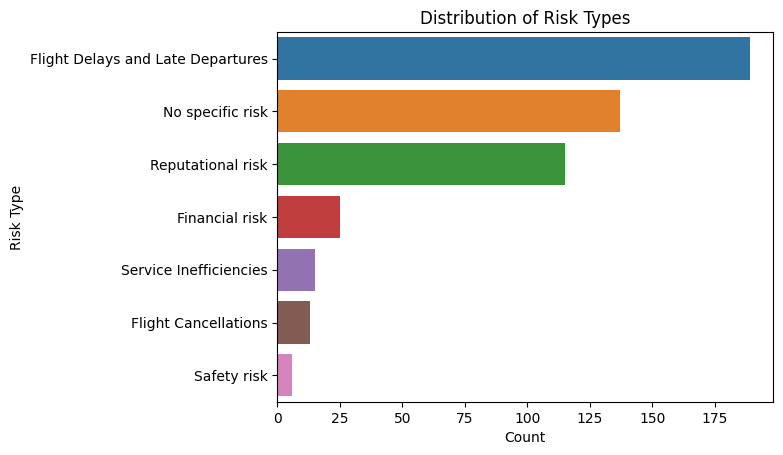

In [ ]:
# Visualization of risk distribution
sns.countplot(y='risk', data=df, order=df['risk'].value_counts().index)
plt.title('Distribution of Risk Types')
plt.xlabel('Count')
plt.ylabel('Risk Type')
plt.show()


# Visualization of sentiment distribution

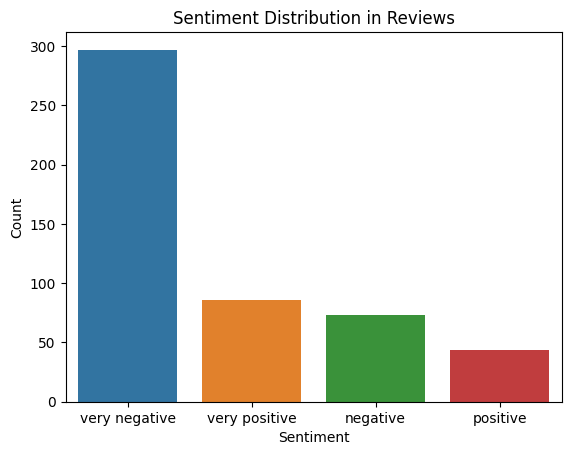

In [ ]:
sns.countplot(x='category_sentiment', data=df, order=df['category_sentiment'].value_counts().index)
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Top 10 Departure and Destination Locations

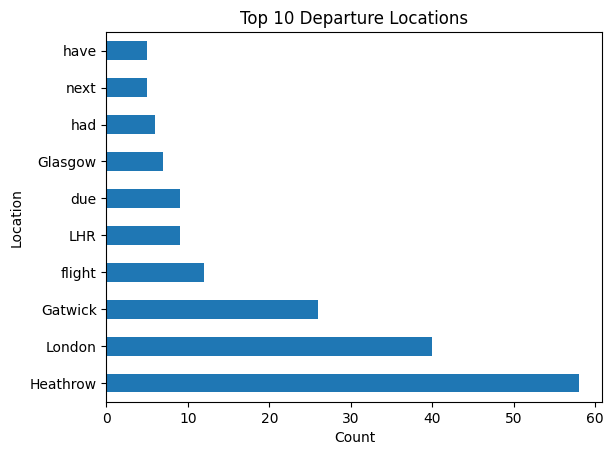

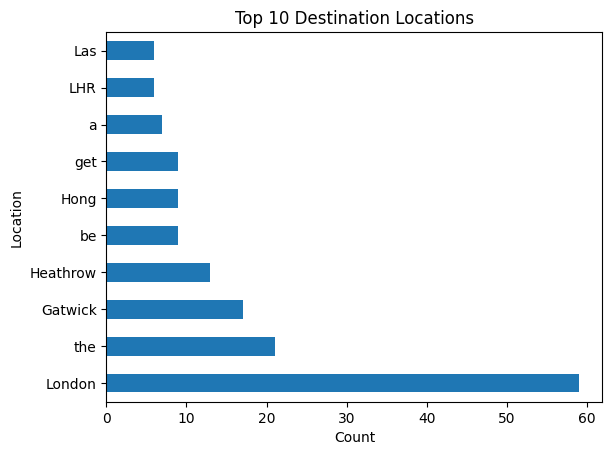

In [ ]:
# Top Departure Locations
df['from'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Departure Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# Top Destination Locations
df['to'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Destination Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


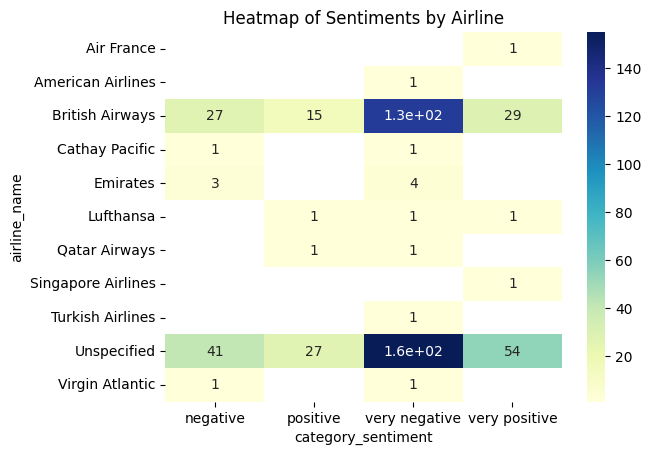

In [ ]:
# Pivot table for sentiments by airline
pivot_table = df.pivot_table(index='airline_name', columns='category_sentiment', values='review', aggfunc='count')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Sentiments by Airline')
plt.show()

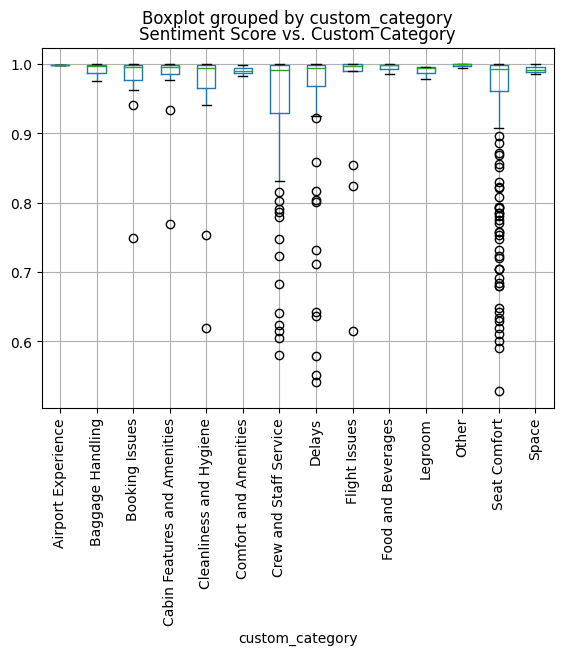

In [ ]:
df.boxplot(column='sentiment_score', by='custom_category', rot=90)
plt.title('Sentiment Score vs. Custom Category')
plt.show()


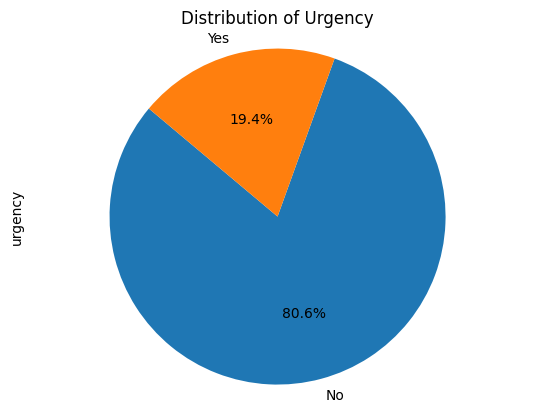

In [ ]:
df['urgency'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Urgency')
plt.show()

In [ ]:
df

,review,risk,from,to,category_sentiment,airline_name,sentiment_score,custom_category,urgency,From_Location,To_Location
0,The service was excellent The cabin staff wer...,No specific risk,None,None,very positive,Unspecified,0.999860,Seat Comfort,No,NaN,NaN
1,We have had some torrid experiences with BA ...,Safety risk,Heathrow,Austin,very positive,Unspecified,0.922118,Delays,No,Heathrow,Austin
2,We had a flight from ZRH to SFO via LHR The le...,No specific risk,ZRH,SFO,very positive,Unspecified,0.999382,Cabin Features and Amenities,No,ZRH,SFO
3,London to Paris I wish that they would update...,No specific risk,London,Paris,very negative,Unspecified,0.999751,Seat Comfort,No,London,Paris
4,JFK to LHR Empty check in and priority securit...,Flight Delays and Late Departures,None,None,positive,Unspecified,0.944987,Crew and Staff Service,No,None,None
...,...,...,...,...,...,...,...,...,...,...,...
495,London to New York JFK We were booked on Brus...,Flight Cancellations,London,New,very negative,Unspecified,0.967043,Seat Comfort,No,London,New
496,Manchester to Heathrow similar to the flight ...,Flight Delays and Late Departures,Manchester,Heathrow,very negative,Unspecified,0.992131,Delays,No,Manchester,Heathrow
497,Flew Zurich to London Heathrow Very friendly s...,Financial risk,Zurich,London,very positive,British Airways,0.991678,Crew and Staff Service,No,Zurich,London
498,Pisa to Chicago via London Heathrow This route...,Reputational risk,Pisa,Chicago,very negative,British Airways,0.992931,Seat Comfort,Yes,Pisa,Chicago
